In [1]:
%cd ../..

f:\DR\Stock-Market-Prediction\src


In [2]:
from lstm_model import build_model, train_model, save_lstm_model, load_lstm_model
from models.lstm_v2.lstm_normalize import get_lstm_data
from utils.chart import config_chart
import tensorflow as tf


---

## For **build_model** function

In [3]:
model = build_model()
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 192)           151296    
                                                                 
 lstm_1 (LSTM)               (None, 96)                110976    
                                                                 
 dense (Dense)               (None, 48)                4656      
                                                                 
 dense_1 (Dense)             (None, 24)                1176      
                                                                 
 dense_2 (Dense)             (None, 3)                 75        
                                                                 
 reshape (Reshape)           (None, 3, 1)              0         
                                                                 
Total params: 268179 (1.02 MB)
Trainable params: 268179

---

## For **train_model** function

In [4]:
train, test, predict = get_lstm_data()

x_train = train['x']
y_train = train['y']
x_dates_train = train['x_dates']
y_dates_train = train['y_dates']

x_test = test['x']
y_test = test['y']
x_dates_test = test['x_dates']
y_dates_test = test['y_dates']

x_predict = predict['x']
y_predict = predict['y']
x_dates_predict = predict['x_dates']
y_dates_predict = predict['y_dates']

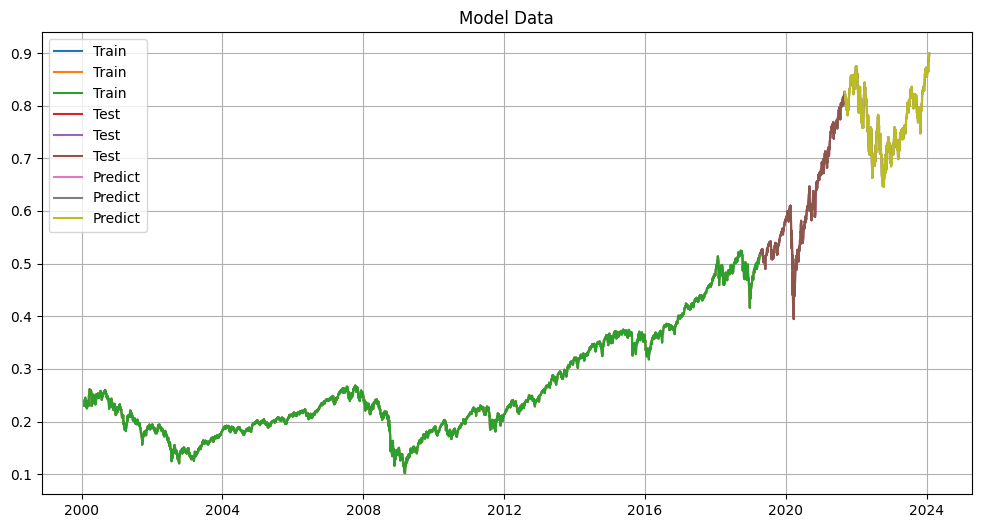

In [5]:
plt = config_chart('Model Data')
plt.plot(y_dates_train, y_train[:, :, 0])
plt.plot(y_dates_test, y_test[:, :, 0])
plt.plot(y_dates_predict, y_predict[:, :, 0])
plt.legend(['Train', 'Train', 'Train',  'Test', 'Test', 'Test', 'Predict', 'Predict', 'Predict'])

In [6]:
model, fit_result, evaluate_result = train_model(x_train, x_test, y_train, y_test)

Epoch 1/50


151/151 - 5s - loss: 0.0016 - mean_absolute_error: 0.0147 - 5s/epoch - 30ms/step
Epoch 2/50
151/151 - 1s - loss: 6.1771e-05 - mean_absolute_error: 0.0059 - 1s/epoch - 10ms/step
Epoch 3/50
151/151 - 2s - loss: 6.0167e-05 - mean_absolute_error: 0.0058 - 2s/epoch - 10ms/step
Epoch 4/50
151/151 - 2s - loss: 5.7058e-05 - mean_absolute_error: 0.0057 - 2s/epoch - 11ms/step
Epoch 5/50
151/151 - 2s - loss: 6.1535e-05 - mean_absolute_error: 0.0059 - 2s/epoch - 10ms/step
Epoch 6/50
151/151 - 2s - loss: 5.4307e-05 - mean_absolute_error: 0.0055 - 2s/epoch - 10ms/step
Epoch 7/50
151/151 - 2s - loss: 6.8558e-05 - mean_absolute_error: 0.0061 - 2s/epoch - 11ms/step
Epoch 8/50
151/151 - 1s - loss: 5.9717e-05 - mean_absolute_error: 0.0058 - 1s/epoch - 10ms/step
Epoch 9/50
151/151 - 2s - loss: 6.2543e-05 - mean_absolute_error: 0.0060 - 2s/epoch - 11ms/step
Epoch 10/50
151/151 - 1s - loss: 5.4424e-05 - mean_absolute_error: 0.0055 - 1s/epoch - 10ms/step
Epoch 11/50
151/151 - 2s - loss: 6.8969e-

Text(0, 0.5, 'Value')

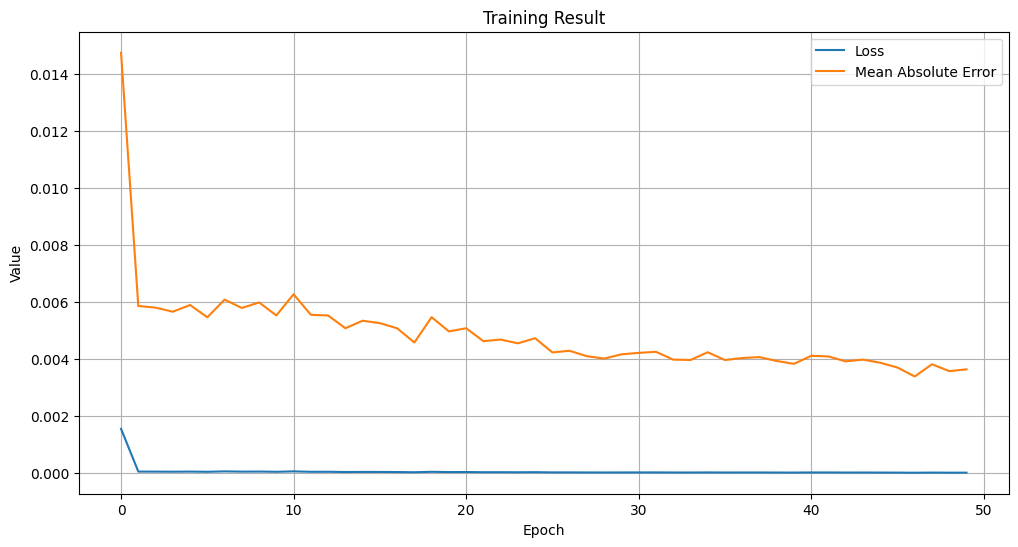

In [7]:
plt = config_chart('Training Result')
plt.plot(fit_result.history['loss'])
plt.plot(fit_result.history['mean_absolute_error'])
plt.legend(['Loss', 'Mean Absolute Error'])
plt.xlabel('Epoch')
plt.ylabel('Value')

In [8]:
save_lstm_model(model)
model = load_lstm_model()

INFO:tensorflow:Assets written to: ./models/lstm_v2/lstm_model_v2\assets


INFO:tensorflow:Assets written to: ./models/lstm_v2/lstm_model_v2\assets


In [9]:
predictions = model.predict(x_test)

19/19 [==============================] - 1s 5ms/step


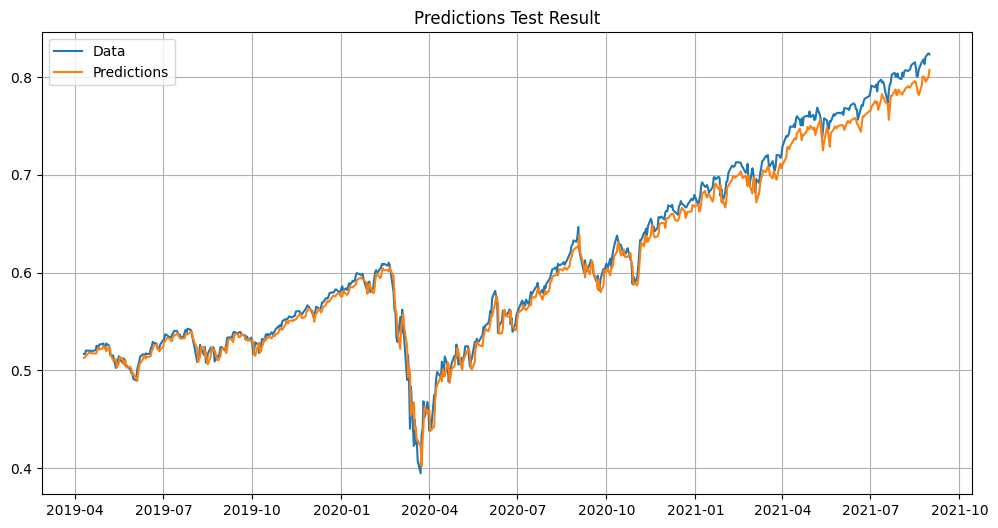

In [10]:
plt = config_chart('Predictions Test Result')
plt.plot(y_dates_test[:, 0], y_test[:, 0])
plt.plot(y_dates_test[:, 0], predictions[:, 0])
plt.legend(['Data', 'Predictions'])

In [11]:
predictions = model.predict(x_predict)

19/19 [==============================] - 0s 5ms/step


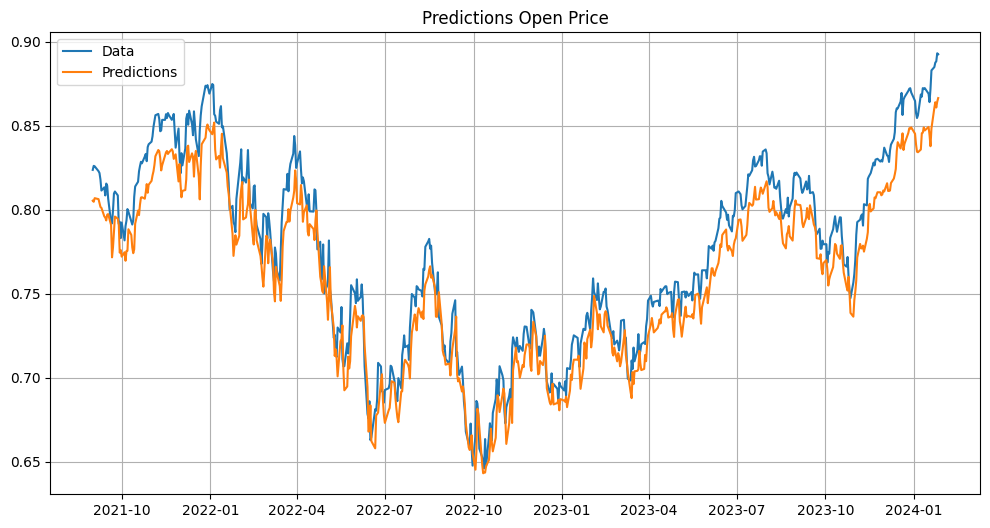

In [12]:
plt = config_chart('Predictions Open Price')
plt.plot(y_dates_predict[:, 0], y_predict[:, 0])
plt.plot(y_dates_predict[:, 0], predictions[:, 0])
plt.legend(['Data', 'Predictions'])

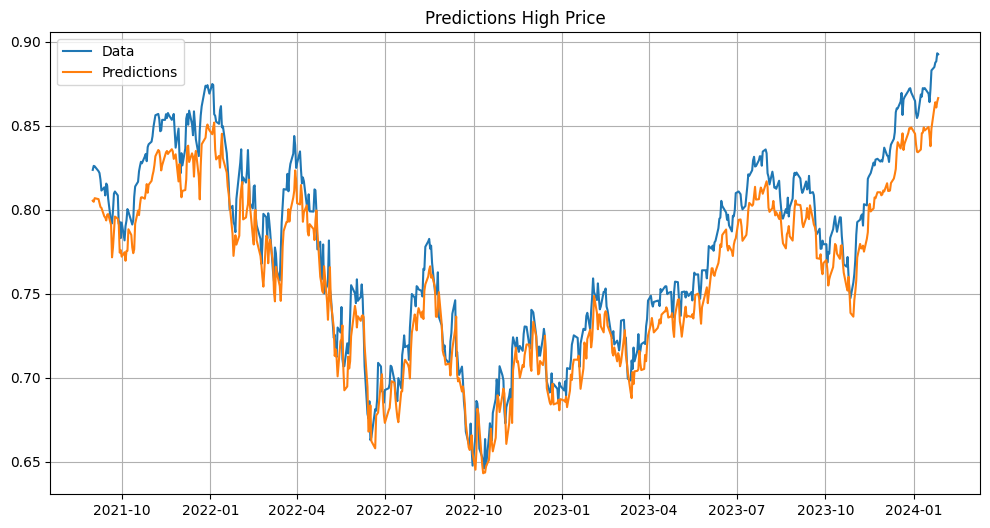

In [16]:
plt = config_chart('Predictions High Price')
plt.plot(y_dates_predict[:, 0], y_predict[:, 0])
plt.plot(y_dates_predict[:, 0], predictions[:, 0])
plt.legend(['Data', 'Predictions'])

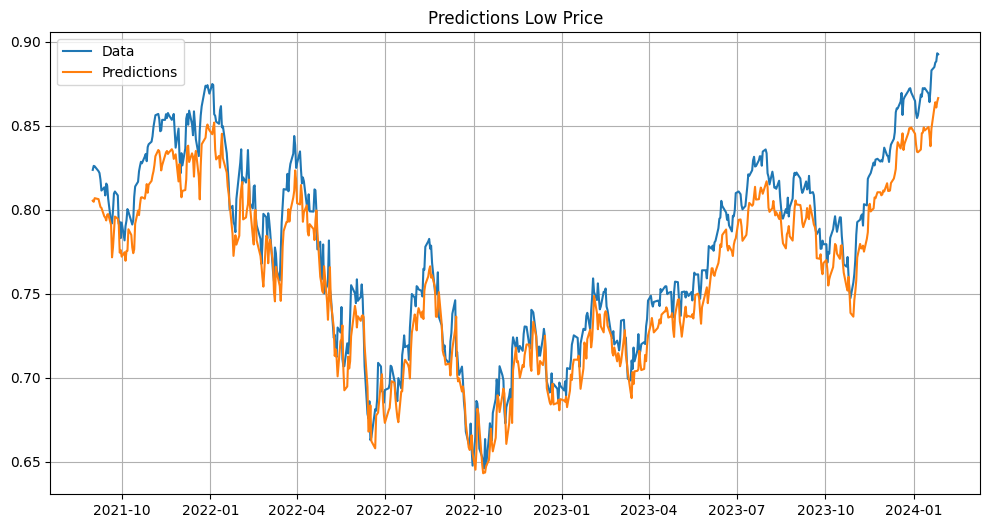

In [18]:
plt = config_chart('Predictions Low Price')
plt.plot(y_dates_predict[:, 0], y_predict[:, 0])
plt.plot(y_dates_predict[:, 0], predictions[:, 0])
plt.legend(['Data', 'Predictions'])

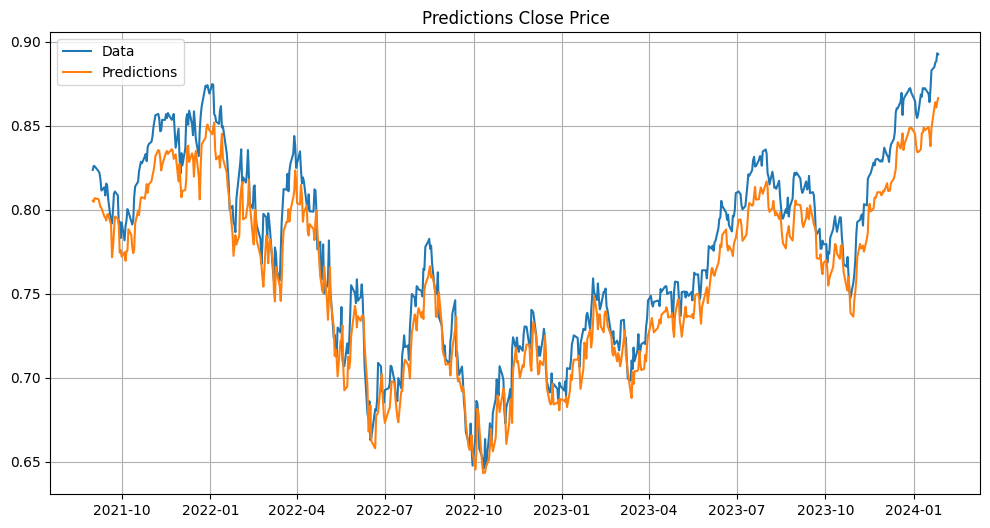

In [28]:
plt = config_chart('Predictions Close Price')
plt.plot(y_dates_predict[:, 0], y_predict[:, 0])
plt.plot(y_dates_predict[:, 0], predictions[:, 0])
plt.legend(['Data', 'Predictions'])

In [20]:

predictions = model.predict(x_predict)

19/19 [==============================] - 0s 7ms/step


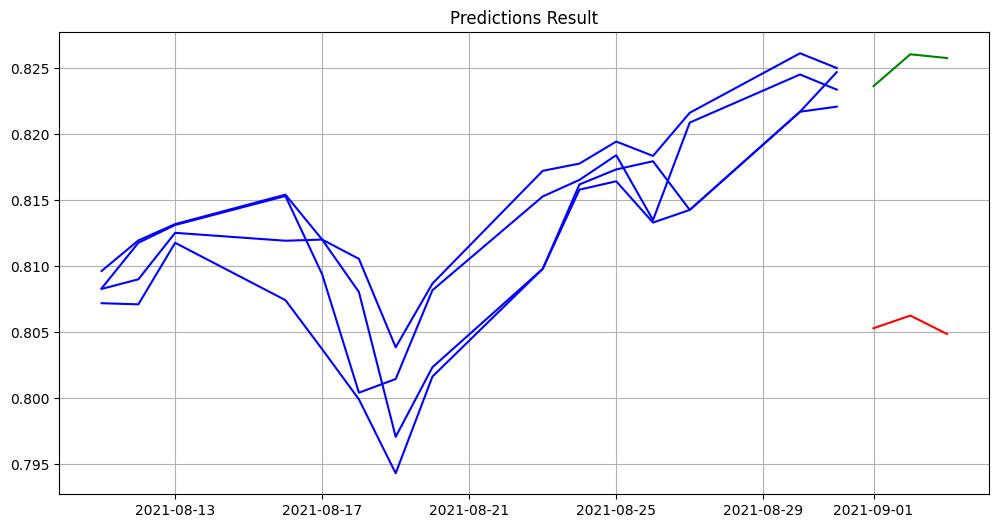

In [21]:
index = 0

plt = config_chart('Predictions Result')
plt.plot(x_dates_predict[index], x_predict[index], color='blue')
plt.plot(y_dates_predict[index], y_predict[index], color='green')
plt.plot(y_dates_predict[index], predictions[index], color='red')
# plt.legend(['Data', 'Real', 'Predictions'])

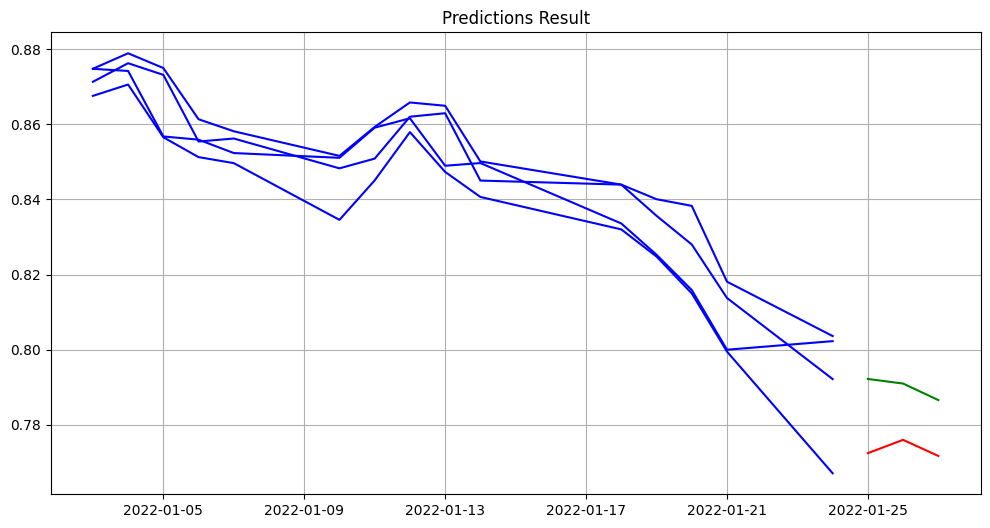

In [22]:
index = 100

plt = config_chart('Predictions Result')
plt.plot(x_dates_predict[index], x_predict[index], color='blue')
plt.plot(y_dates_predict[index], y_predict[index], color='green')
plt.plot(y_dates_predict[index], predictions[index], color='red')

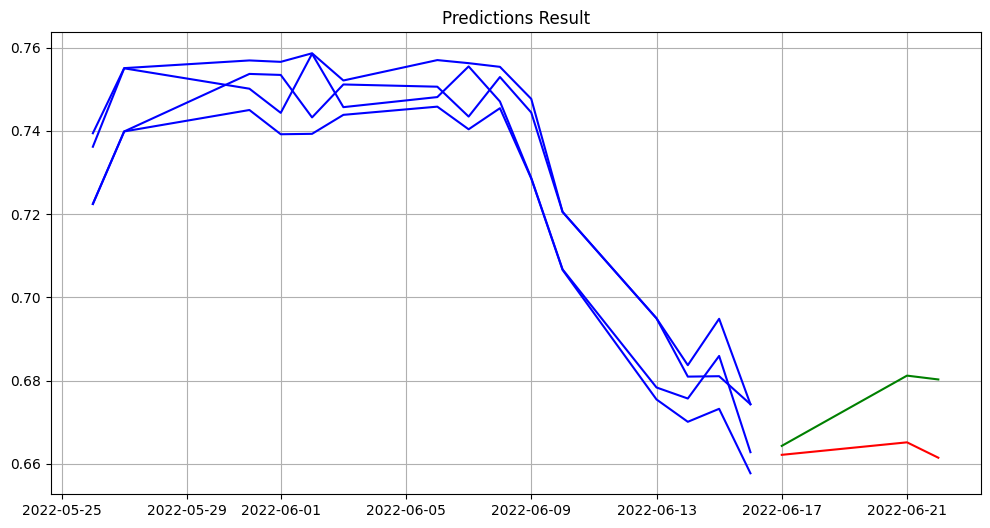

In [23]:
index = 200

plt = config_chart('Predictions Result')
plt.plot(x_dates_predict[index], x_predict[index], color='blue')
plt.plot(y_dates_predict[index], y_predict[index], color='green')
plt.plot(y_dates_predict[index], predictions[index], color='red')

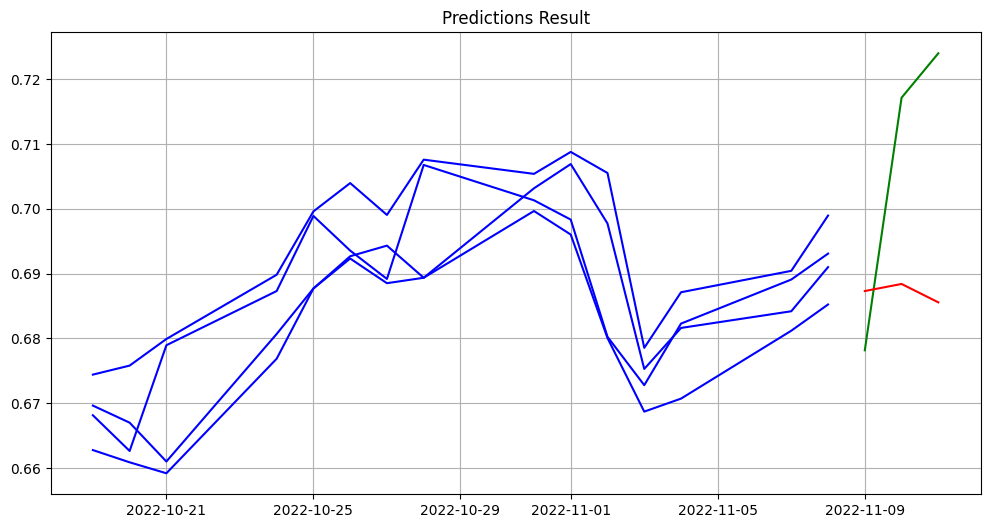

In [24]:
index = 300

plt = config_chart('Predictions Result')
plt.plot(x_dates_predict[index], x_predict[index], color='blue')
plt.plot(y_dates_predict[index], y_predict[index], color='green')
plt.plot(y_dates_predict[index], predictions[index], color='red')

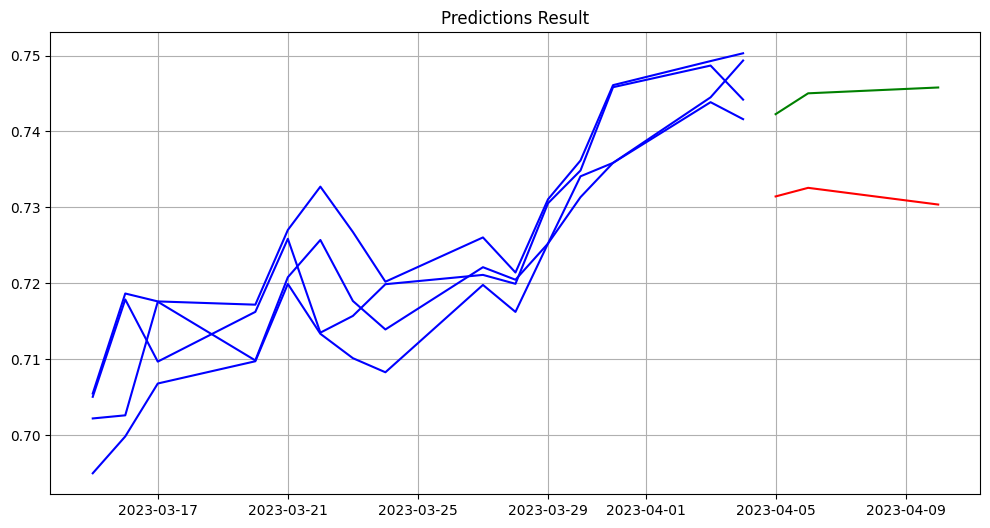

In [25]:
index = 400

plt = config_chart('Predictions Result')
plt.plot(x_dates_predict[index], x_predict[index], color='blue')
plt.plot(y_dates_predict[index], y_predict[index], color='green')
plt.plot(y_dates_predict[index], predictions[index], color='red')

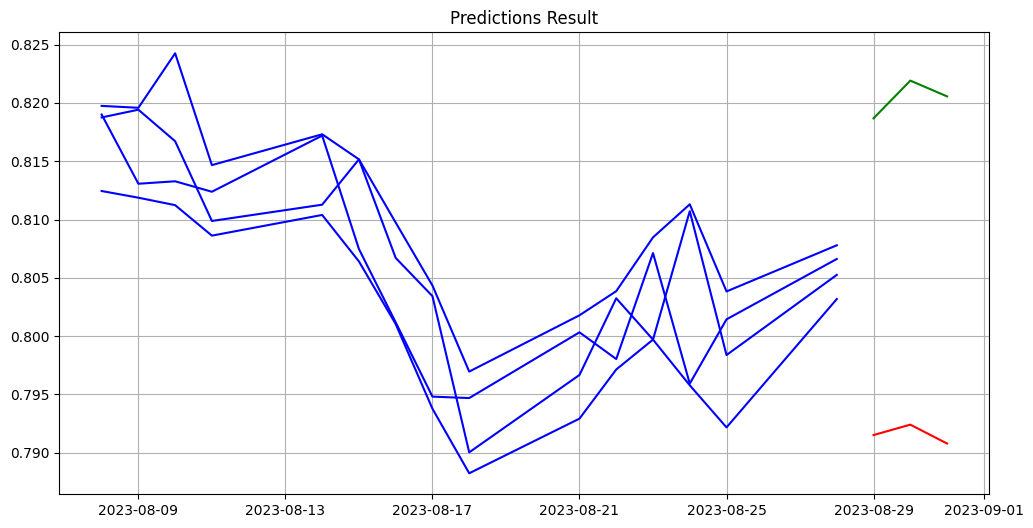

In [26]:
index = 500

plt = config_chart('Predictions Result')
plt.plot(x_dates_predict[index], x_predict[index], color='blue')
plt.plot(y_dates_predict[index], y_predict[index], color='green')
plt.plot(y_dates_predict[index], predictions[index], color='red')

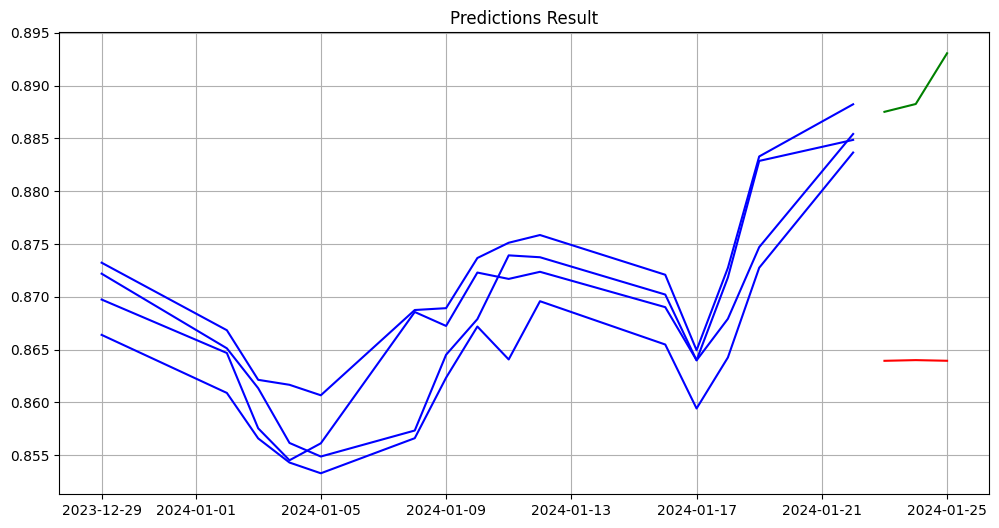

In [27]:
index = 600

plt = config_chart('Predictions Result')
plt.plot(x_dates_predict[index], x_predict[index], color='blue')
plt.plot(y_dates_predict[index], y_predict[index], color='green')
plt.plot(y_dates_predict[index], predictions[index], color='red')